In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math



In [30]:
num_of_clusters=2
dataset1 = pd.read_csv("cm_dataset_2 - cm_dataset.csv",header=None)
dataset1=np.array(dataset1)

In [31]:
X=dataset1.T
N = X.shape[1]      

# SPECTRAL CLUSTERING

# radial kernel

405.71108892140813
564.5633566042852
564.2181433919425
564.6004249273468


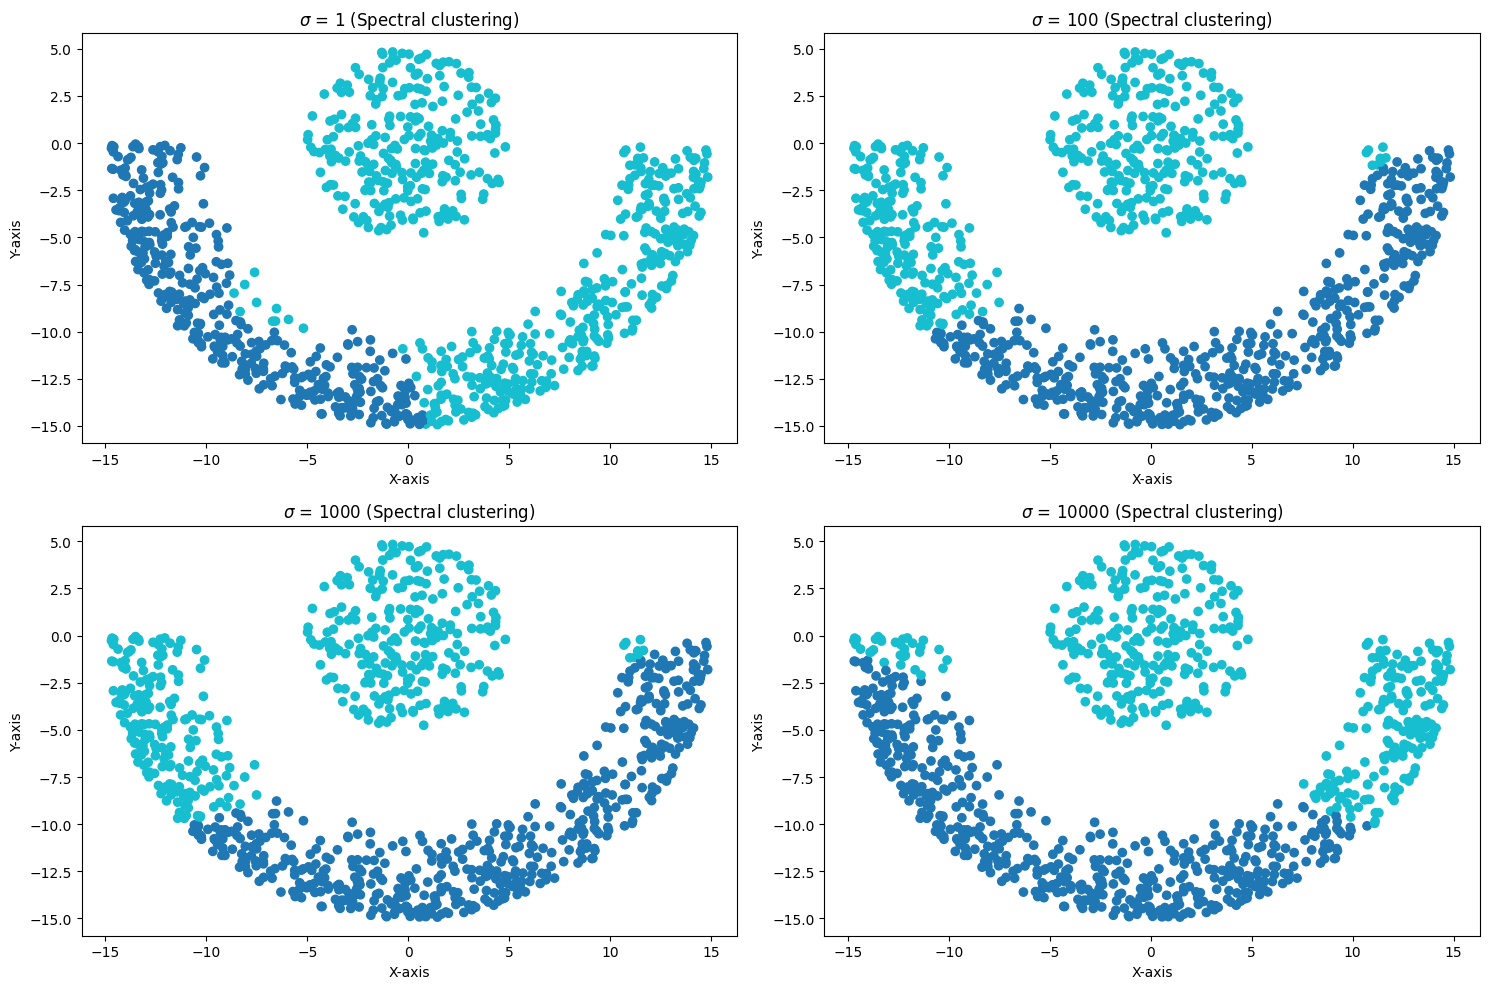

In [32]:
np.random.seed(99)
sigmas=[1,100,1000,10000]
K=2
fig,axs=plt.subplots(2,2,figsize=(15,10))
a=0
for sigma in sigmas:
    
    R_Kernel_matrix=np.zeros((N,N))
    for i in range(N) :
        for j in range(N):
            R_Kernel_matrix[i][j]=math.exp(-1*(np.dot((X[:,i]-X[:,j]).T,(X[:,i]-X[:,j])))/(2*(sigma*sigma)))

    sum_of_elements_row=np.sum(R_Kernel_matrix,axis=1)/N
    sum_of_elements_row=sum_of_elements_row.reshape(-1,1)
    sum_of_elements_col=np.sum(R_Kernel_matrix,axis=0)/N
    totalsum_of_elements =np.sum(R_Kernel_matrix)/((N)*(N))
    Centered_R_Kernel_matrix=np.zeros((N,N))
    Centered_R_Kernel_matrix=R_Kernel_matrix -sum_of_elements_col-sum_of_elements_row+totalsum_of_elements

    R_Kernel_eigenvalues,R_Kernel_eigenvectors=np.linalg.eigh(Centered_R_Kernel_matrix)
    R_Kernel_eigenvalues=R_Kernel_eigenvalues[::-1]
    R_Kernel_eigenvectors=R_Kernel_eigenvectors[:,::-1]
    H = R_Kernel_eigenvectors[:, :K]
    norm = np.sqrt(np.sum(H**2, axis=1))
    # norm = norm.reshape(-1,1)
    for i in range(H.shape[0]) :
     H[i][0]=H[i][0]/norm[i]
     H[i][1]=H[i][1]/norm[i]

    dataset = H
    current_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    Next_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    current_cluster_assignement=np.random.randint(0,num_of_clusters,dataset.shape[0])


    mean_of_clusters=np.zeros((num_of_clusters,2))
    for i in range(num_of_clusters) :
        temp=0
        for j in range(dataset.shape[0]) :
         if current_cluster_assignement[j]==i :
            temp+=1
            mean_of_clusters[i]+=dataset[j]
        mean_of_clusters[i]/= temp    


    while True :

        # error_temp =0
        
        for i in range(dataset.shape[0]) :
         t=current_cluster_assignement[i]

        #  error_temp+=((dataset[i][0]-mean_of_clusters[t][0])**2)+((dataset[i][1]-mean_of_clusters[t][1])**2)

            
         Next_cluster_assignement[i]=np.argmin([((dataset[i][0]-mean_of_clusters[j][0])**2)+((dataset[i][1]-mean_of_clusters[j][1])**2) for j in range(num_of_clusters)])

        # error_function.append(error_temp)

        if  np.array_equal(Next_cluster_assignement,current_cluster_assignement):
         break
    
        current_cluster_assignement = Next_cluster_assignement.copy()
        mean_of_clusters=np.zeros((num_of_clusters,2))
        for i in range(num_of_clusters) :
            temp=0
            for j in range(dataset.shape[0]) :
                if current_cluster_assignement[j]==i :
                 temp+=1
                 mean_of_clusters[i]+=dataset[j]
            mean_of_clusters[i]/= temp
    error_temp=0
    for i in range(dataset.shape[0]) :
         t=current_cluster_assignement[i]

         error_temp+=((dataset[i][0]-mean_of_clusters[t][0])**2)+((dataset[i][1]-mean_of_clusters[t][1])**2)
    print(error_temp)   
    colors =plt.cm.tab10(np.linspace(0,1,num_of_clusters))
    # error_for_5_intialisations.append(error_function)
    color_of_each_cluster=colors[current_cluster_assignement]
    axs[int(a/2),a%2].scatter(dataset1[:,0],dataset1[:,1],c=color_of_each_cluster)
    axs[int(a/2),a%2].set_xlabel("X-axis")
    axs[int(a/2),a%2].set_ylabel("Y-axis")
    axs[int(a/2),a%2].set_title("$\\sigma$ = "+str(sigma)+" (Spectral clustering)")
    #axs[int(a/2),a%2].scatter(H[:,0],H[:,1],c=color_of_each_cluster)
    a+=1
plt.tight_layout()
plt.show()    

# polynomail kernel

538.8828822344904
559.7598978913778
473.9516036338083
505.30041615077283


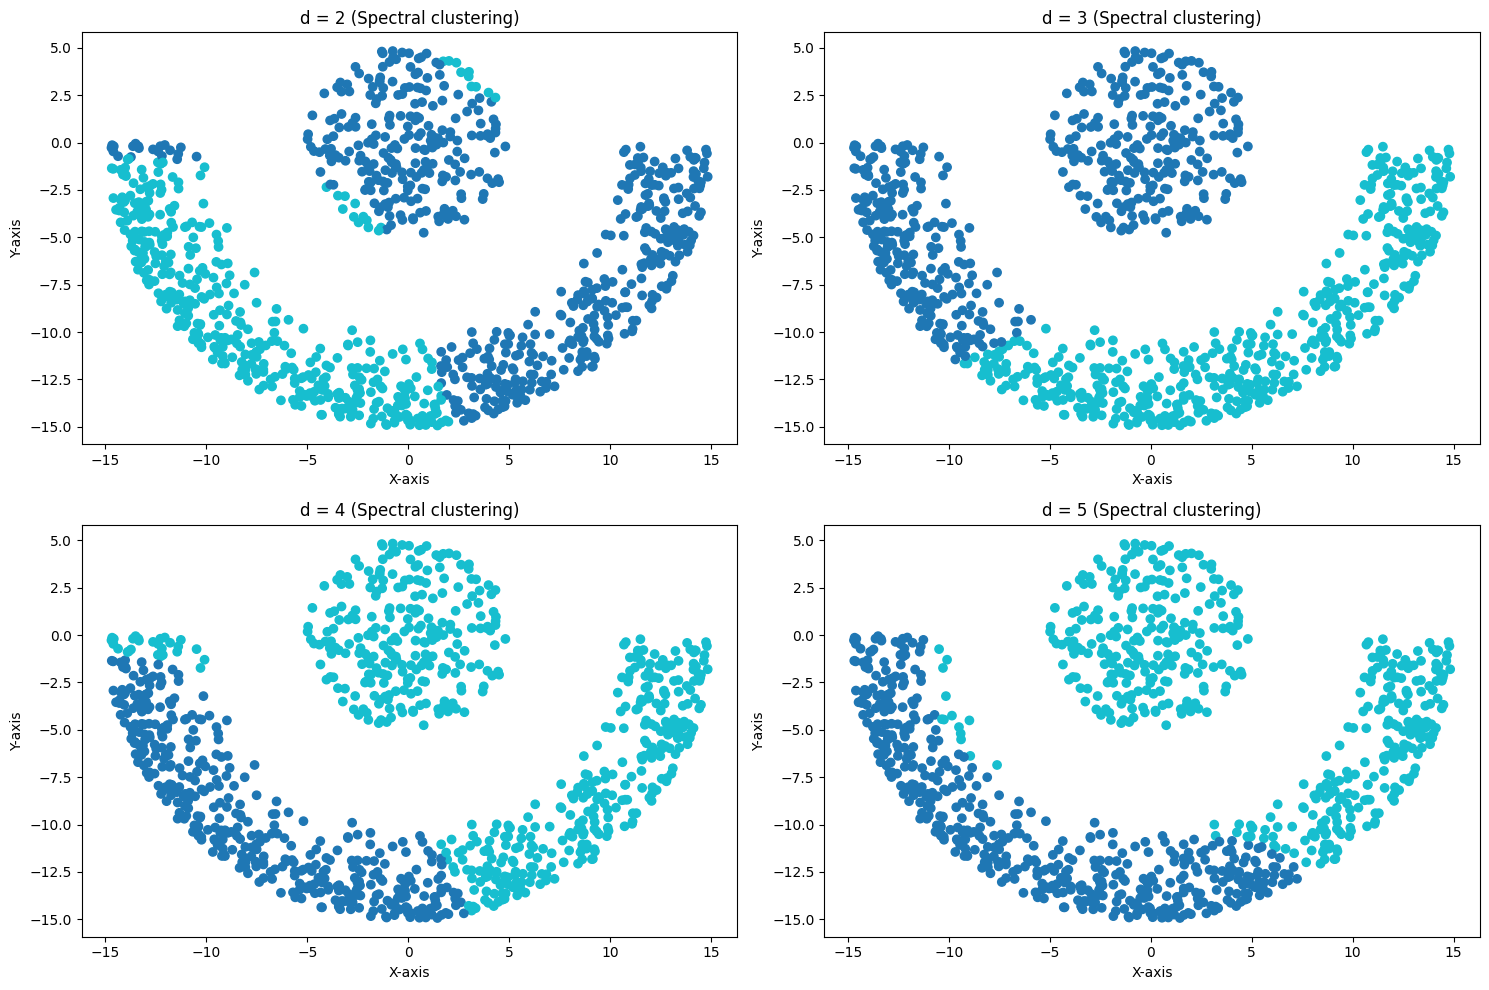

In [33]:

degrees = [2,3,4,5]
K=2
fig,axs=plt.subplots(2,2,figsize=(15,10))
a=0

for degree in degrees :
    
    

    P_Kernel_matrix=np.zeros((N,N))
    P_Kernel_matrix=(1+np.matmul(X.T,X))**degree
    sum_of_elements_row=np.sum(P_Kernel_matrix,axis=1)/N
    sum_of_elements_row=sum_of_elements_row.reshape(-1,1)
    sum_of_elements_col=np.sum(P_Kernel_matrix,axis=0)/N
    totalsum_of_elements =np.sum(P_Kernel_matrix)/((N)*(N))
    Centered_P_Kernel_matrix=np.zeros((N,N))
    Centered_P_Kernel_matrix=P_Kernel_matrix -sum_of_elements_col-sum_of_elements_row+totalsum_of_elements

    P_Kernel_eigenvalues,P_Kernel_eigenvectors=np.linalg.eigh(Centered_P_Kernel_matrix)
    P_Kernel_eigenvalues=P_Kernel_eigenvalues[::-1]
    P_Kernel_eigenvectors=P_Kernel_eigenvectors[:,::-1]
    H = P_Kernel_eigenvectors[:, :K]
    norm = np.sqrt(np.sum(H**2, axis=1))
    # norm = norm.reshape(-1,1)
    for i in range(H.shape[0]) :
     H[i][0]=H[i][0]/norm[i]
     H[i][1]=H[i][1]/norm[i]

    dataset = H
    current_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    Next_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    current_cluster_assignement=np.random.randint(0,num_of_clusters,dataset.shape[0])


    mean_of_clusters=np.zeros((num_of_clusters,2))
    for i in range(num_of_clusters) :
        temp=0
        for j in range(dataset.shape[0]) :
         if current_cluster_assignement[j]==i :
            temp+=1
            mean_of_clusters[i]+=dataset[j]
        mean_of_clusters[i]/= temp    


    while True :

        # error_temp =0
        
        for i in range(dataset.shape[0]) :
         t=current_cluster_assignement[i]

        #  error_temp+=((dataset[i][0]-mean_of_clusters[t][0])**2)+((dataset[i][1]-mean_of_clusters[t][1])**2)

            
         Next_cluster_assignement[i]=np.argmin([((dataset[i][0]-mean_of_clusters[j][0])**2)+((dataset[i][1]-mean_of_clusters[j][1])**2) for j in range(num_of_clusters)])

        # error_function.append(error_temp)

        if  np.array_equal(Next_cluster_assignement,current_cluster_assignement):
         break
    
        current_cluster_assignement = Next_cluster_assignement.copy()
        mean_of_clusters=np.zeros((num_of_clusters,2))
        for i in range(num_of_clusters) :
            temp=0
            for j in range(dataset.shape[0]) :
                if current_cluster_assignement[j]==i :
                 temp+=1
                 mean_of_clusters[i]+=dataset[j]
            mean_of_clusters[i]/= temp
         
    error_temp = 0
        
    for i in range(dataset.shape[0]) :
         t=current_cluster_assignement[i]

         error_temp+=((dataset[i][0]-mean_of_clusters[t][0])**2)+((dataset[i][1]-mean_of_clusters[t][1])**2)
    print(error_temp) 
    colors =plt.cm.tab10(np.linspace(0,1,num_of_clusters))
    # error_for_5_intialisations.append(error_function)
    color_of_each_cluster=colors[current_cluster_assignement]
    axs[int(a/2),a%2].scatter(dataset1[:,0],dataset1[:,1],c=color_of_each_cluster)
    axs[int(a/2),a%2].set_xlabel("X-axis")
    axs[int(a/2),a%2].set_ylabel("Y-axis")
    axs[int(a/2),a%2].set_title("d = "+str(degree)+" (Spectral clustering)")
    #axs[int(a/2),a%2].scatter(H[:,0],H[:,1],c=color_of_each_cluster)
    a+=1
plt.tight_layout()    
plt.show()    



# CLUSTERING BY GIVEN ASSIGNEMENT


# radial kernel

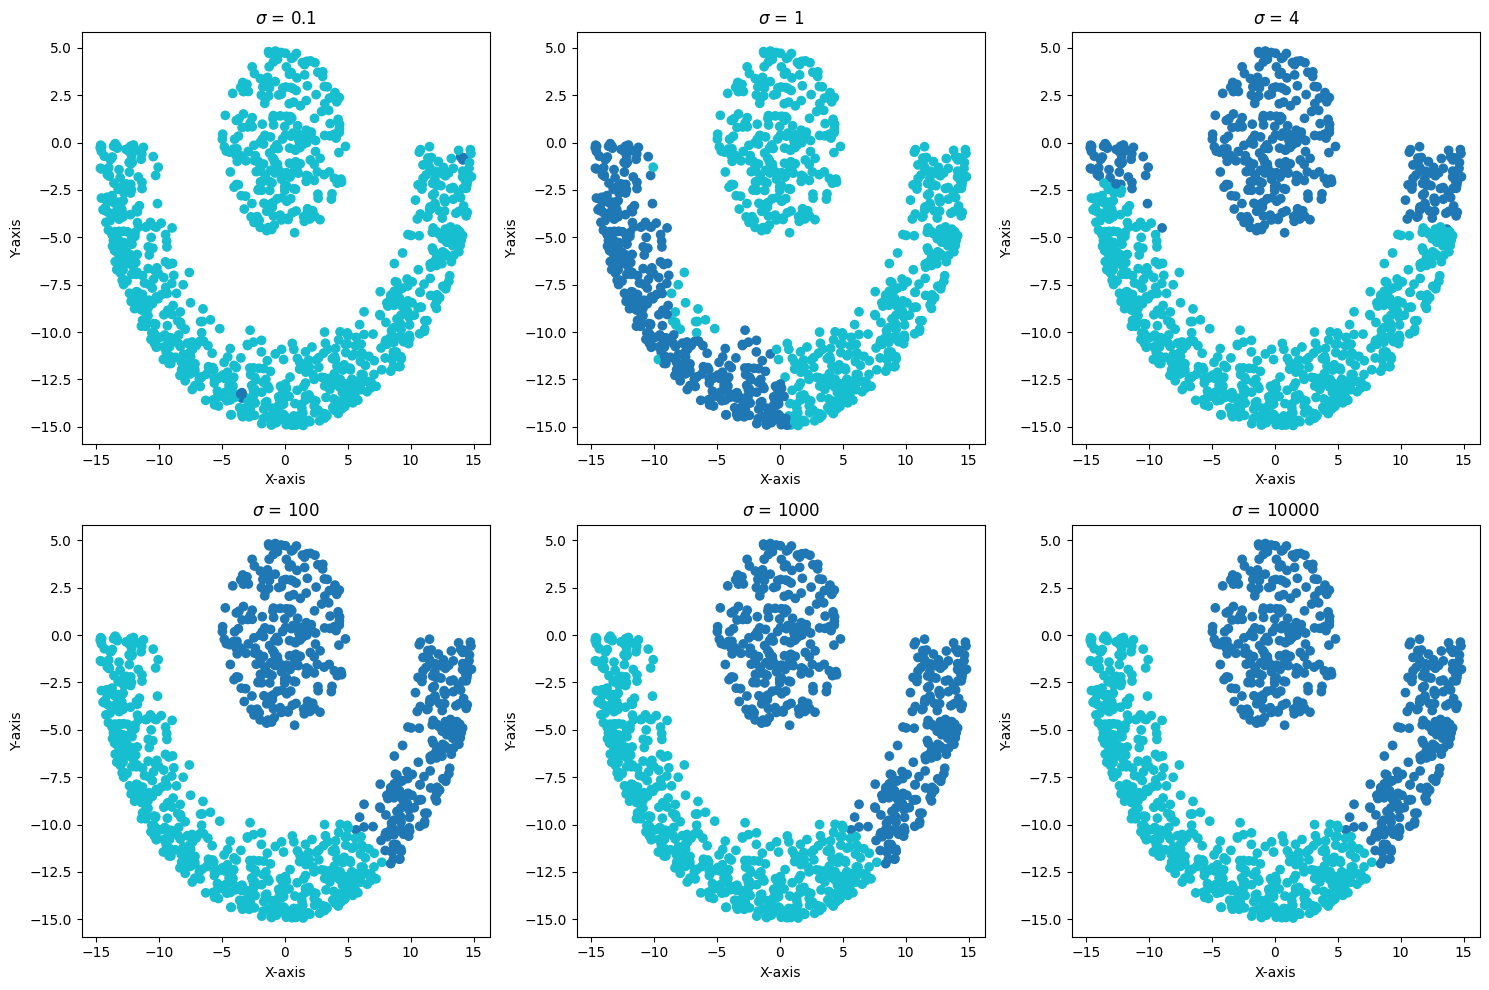

In [34]:

degrees = [2,3,4,5,10,15,20,25,30]
sigmas=[0.1,1,4,100,1000,10000]
K=2
fig,axs=plt.subplots(2,3,figsize=(15,10))
b=0
for sigma in sigmas :  
    
    R_Kernel_matrix=np.zeros((N,N),dtype=np.float64)
    for i in range(N) :
        for j in range(N):
            R_Kernel_matrix[i][j]=math.exp(-1*(np.dot((X[:,i]-X[:,j]).T,(X[:,i]-X[:,j])))/(2*(sigma*sigma)))

    sum_of_elements_row=np.sum(R_Kernel_matrix,axis=1)/N
    sum_of_elements_row=sum_of_elements_row.reshape(-1,1)
    sum_of_elements_col=np.sum(R_Kernel_matrix,axis=0)/N
    totalsum_of_elements =np.sum(R_Kernel_matrix)/((N)*(N))
    Centered_R_Kernel_matrix=np.zeros((N,N))
    Centered_R_Kernel_matrix=R_Kernel_matrix -sum_of_elements_col-sum_of_elements_row+totalsum_of_elements

    R_Kernel_eigenvalues,R_Kernel_eigenvectors=np.linalg.eigh(Centered_R_Kernel_matrix)
    R_Kernel_eigenvalues=R_Kernel_eigenvalues[::-1]
    R_Kernel_eigenvectors=R_Kernel_eigenvectors[:,::-1]
    H = R_Kernel_eigenvectors[:, :K]
    dataset=H
    current_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    for i in range(N) :
     current_cluster_assignement[i] = np.argmax(H[i]) 
    color_of_each_cluster=colors[current_cluster_assignement]
    axs[int(b/3),b%3].scatter(dataset1[:,0],dataset1[:,1],c=color_of_each_cluster)
    axs[int(b/3),b%3].set_xlabel("X-axis")
    axs[int(b/3),b%3].set_ylabel("Y-axis")
    axs[int(b/3),b%3].set_title("$\\sigma$ = "+str(sigma))
    #axs[int(a/2),a%2].scatter(H[:,0],H[:,1],c=color_of_each_cluster)
    b+=1
plt.tight_layout()
plt.show()   

# polynomial kernel

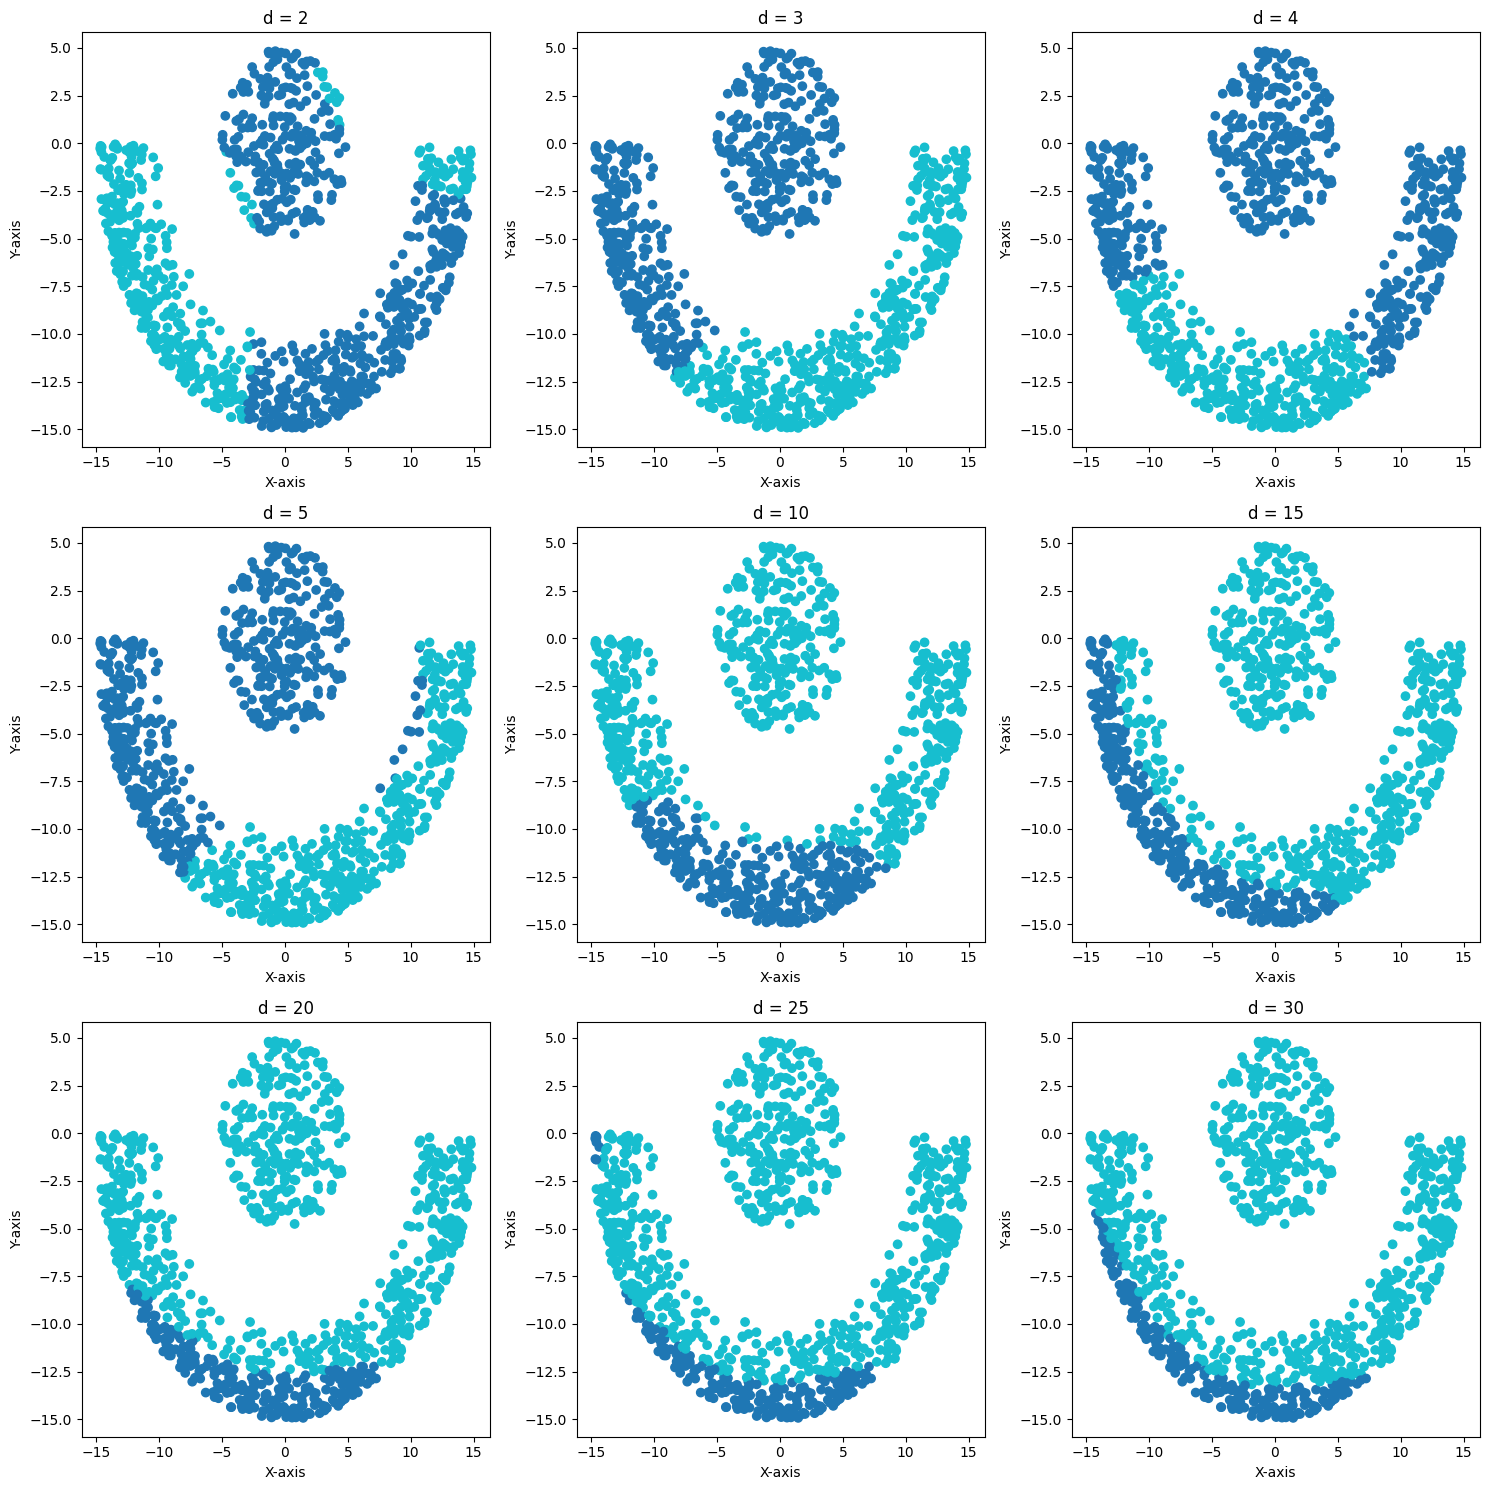

In [35]:

fig,axs=plt.subplots(3,3,figsize=(15,15))
b=0
for degree in degrees :
    
    

    P_Kernel_matrix=np.zeros((N,N),dtype=np.float64)
    P_Kernel_matrix=(1+np.matmul(X.T,X))**degree
    sum_of_elements_row=np.sum(P_Kernel_matrix,axis=1)/N
    sum_of_elements_row=sum_of_elements_row.reshape(-1,1)
    sum_of_elements_col=np.sum(P_Kernel_matrix,axis=0)/N
    totalsum_of_elements =np.sum(P_Kernel_matrix)/((N)*(N))
    Centered_P_Kernel_matrix=np.zeros((N,N),dtype=np.float64)
    Centered_P_Kernel_matrix=P_Kernel_matrix -sum_of_elements_col-sum_of_elements_row+totalsum_of_elements

    P_Kernel_eigenvalues,P_Kernel_eigenvectors=np.linalg.eigh(Centered_P_Kernel_matrix)
    P_Kernel_eigenvalues=P_Kernel_eigenvalues[::-1]
    P_Kernel_eigenvectors=P_Kernel_eigenvectors[:,::-1]
    H = P_Kernel_eigenvectors[:, :K]
    dataset=H
    current_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
    for i in range(N) :
     current_cluster_assignement[i] = np.argmax(H[i])
    colors =plt.cm.tab10(np.linspace(0,1,num_of_clusters))
    color_of_each_cluster=colors[current_cluster_assignement]
    axs[int(b/3),b%3].scatter(dataset1[:,0],dataset1[:,1],c=color_of_each_cluster)
    axs[int(b/3),b%3].set_xlabel("X-axis")
    axs[int(b/3),b%3].set_ylabel("Y-axis")
    axs[int(b/3),b%3].set_title("d = "+str(degree))
    #axs[int(a/2),a%2].scatter(H[:,0],H[:,1],c=color_of_each_cluster)
    b+=1
plt.tight_layout()
plt.show()    